<a href="https://colab.research.google.com/github/Gweneal3/Machine_Learning_YT/blob/master/Gold%20Price%20Prediction/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [ ]:
gold_dataset = pd.read_csv('./gld_price_data.csv')

In [ ]:
print(gold_dataset.shape)

(2290, 6)


In [ ]:
print(gold_dataset.head())

       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099


In [ ]:
print(gold_dataset.tail())

           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


In [ ]:
print(gold_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [ ]:
print(gold_dataset.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [ ]:
correlation = gold_dataset.corr()

<Axes: >

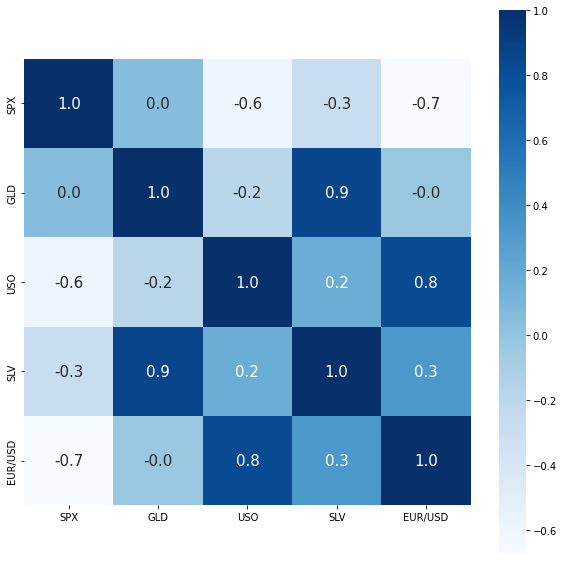

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True, fmt = '.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

In [27]:
# correlation values of GOLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

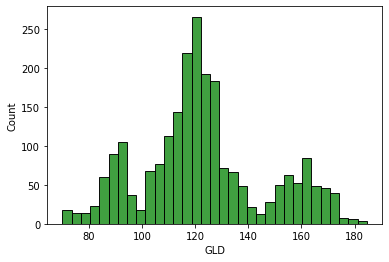

In [34]:
# checking for distribution of the Gold Price
sns.histplot(gold_dataset['GLD'],color='green') # sns.displot(gold_dataset['GLD'],color='green')

Spliting Feature and Target

In [35]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

Split to Test and Training Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [41]:
regressor = RandomForestRegressor(n_estimators=100);

In [42]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evaluation

In [45]:
X_test_prediction = regressor.predict(X_test)

In [46]:
# r2 score
error_score = metrics.r2_score(Y_test, X_test_prediction)

In [47]:
print(error_score)

0.9885090261788855


Compare Actual and Predicted

In [48]:
Y_test = list(Y_test)

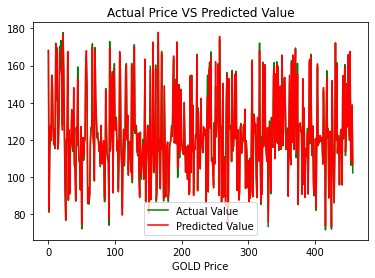

In [58]:
plt.plot(Y_test, color='green', label='Actual Value')
plt.plot(X_test_prediction, color='red',label='Predicted Value')
plt.title('Actual Price VS Predicted Value')
plt.xlabel("Number of values")
plt.xlabel('GOLD Price')
plt.legend()
plt.show()